# Pycaretドキュメントを見て、top3のブレンドしたモデルを作る
stadium_mobilization_person スタジアムの平均観客数（人）の削除  
stadium_mobilization 追加  
祝日:holidayを追加  
SIGNATE投稿結果 3,209.1424947  
train_all_column_additionを使用  
- [中級者用ドキュメント](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)
- [初級者用ドキュメント](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)

## インポート

In [8]:
from pycaret.regression import *

## データの読み込み

In [9]:
train = pd.read_csv("data/create/train_all_column_addition.csv")

In [10]:
train.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa', 'tv_num', 'home_lat',
       'home_long', 'away_lat', 'away_long', 'distance_km', 'mobilization',
       'stage_stadium', 'stadium_mobilization', 'MONTH', 'WEEK', 'timezone',
       'WEEK_timezone_num', 'nhk', 'WEATHER', 'temp_condition', 'hours',
       'holiday'],
      dtype='object')

In [11]:
# 必要なものを抜き出す
select_cols = ['y', 'year', 'stage', 'home', 'away',
       'stadium', 'temperature', 'referee', 'capa', 'tv_num',  'distance_km', 
       'stadium_mobilization', 'MONTH', 'WEEK', 'timezone', 'nhk', 'WEATHER', 'holiday']
train_select = train[select_cols]

In [12]:
train_select.head()

,y,year,stage,home,away,stadium,temperature,referee,capa,tv_num,distance_km,stadium_mobilization,MONTH,WEEK,timezone,nhk,WEATHER,holiday
0,18250,2012,Ｊ１,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,3.8,木村 博之,19694,4,259.062331,0.766782,3,土,1,1,雨,0
1,24316,2012,Ｊ１,名古屋グランパス,清水エスパルス,豊田スタジアム,12.4,西村 雄一,40000,4,120.059935,0.512800,3,土,1,0,屋,0
2,17066,2012,Ｊ１,ガンバ大阪,ヴィッセル神戸,万博記念競技場,11.3,高山 啓義,21000,4,38.255309,0.712667,3,土,1,0,晴,0
3,29603,2012,Ｊ１,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,11.4,松尾 一,50000,4,685.986038,0.306080,3,土,1,0,曇,0
4,25353,2012,Ｊ１,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,22.5,廣瀬 格,39232,4,966.885906,0.330954,3,土,1,0,屋,0


In [13]:
# データをセット
dataset=train_select

In [14]:
dataset.shape

(1952, 18)

## 訓練データとテストデータを9：1の割合で分割

In [15]:
data = dataset.sample(frac =0.9, random_state = 0).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
print("All Data: " + str(dataset.shape))
print("Data for Modeling: " + str(data.shape))
print("Unseen Data For Predictions: " + str(data_unseen.shape))

All Data: (1952, 18)
Data for Modeling: (1757, 18)
Unseen Data For Predictions: (195, 18)


## 環境を作る、前処理をする
すべてのデータ型が正しく認識された場合、Enter キーを押して処理を続行するか、quit キーを押して処理を終了する  
データの型がちがう時は、`numeric_features = ["tv_num"]`みたいに設定してあげる

In [16]:
# target：目標値
exp = setup(data=data, target='y',numeric_features = ["tv_num"])
# それぞれのデータはどういうものか表示 確認

,Description,Value
0,session_id,4190
1,Target,y
2,Original Data,"(1757, 18)"
3,Missing Values,0
4,Numeric Features,5
5,Categorical Features,12
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(1229, 206)"


## 全てのモデルを比較する
`n_select`パラメータを使用すると、上位N個のモデルを返す
- 不要だったもの
  - `exclude = ['ransac']`は使わないよって意味らしい。省略して良さそう
  - `sort = "R2"`, `fold = 10` これもデフォルト

In [17]:
top3 = compare_models(exclude = ['ransac'], n_select = 3, sort = "R2", fold = 10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2071.5404,9116809.2546,3000.5223,0.8393,0.2831,0.2389,0.0980
llar,Lasso Least Angle Regression,2065.9612,9175413.8888,3013.5819,0.8380,0.3447,0.2415,0.4600
xgboost,Extreme Gradient Boosting,2067.9276,9196386.2306,3012.0040,0.8379,0.2815,0.2329,0.5350
ridge,Ridge Regression,2119.7635,9426177.3945,3054.7346,0.8333,0.3233,0.2525,0.0090
omp,Orthogonal Matching Pursuit,2157.9634,9509046.4382,3071.4300,0.8324,0.3682,0.2556,0.0110
lasso,Lasso Regression,2111.7957,9539905.9600,3071.6429,0.8310,0.3228,0.2485,0.0200
lightgbm,Light Gradient Boosting Machine,2090.9204,9669734.6773,3087.0712,0.8292,0.2847,0.2329,0.6010
rf,Random Forest Regressor,2099.9978,9936011.5635,3128.4871,0.8262,0.2831,0.2349,0.2580
lr,Linear Regression,2265.5786,10658855.6576,3248.8387,0.8113,0.3972,0.2755,0.4720
et,Extra Trees Regressor,2200.8647,10803554.5228,3266.3959,0.8088,0.2965,0.2425,0.3510


In [18]:
type(top3)

list

- top3の中身の確認  
  GradientBoostingRegressor, LassoLars, XGBRegressorの3つが入っている

In [19]:
print(top3)

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4190, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=4190, verbose=False), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, co

## モデルの作成
- 複数のモデルを作成し、個々の予測を平均して最終的な予測を作成
- (ほかにもシングルモデル、スタッキングなどある)


### ①任意の3つをブレンドモデルを作成

In [20]:
# それぞれモデルを作成
lightgbm = create_model('lightgbm', verbose = False)
gbr = create_model('gbr', verbose = False)
xgboost = create_model('xgboost', verbose = False)

/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/niko/Desktop/MyApp/st

In [21]:
# 個々のモデルをブレンドする
blender = blend_models(estimator_list = [lightgbm, gbr, xgboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1733.9685,7029520.3219,2651.3243,0.8790,0.2423,0.2027
1,1950.8532,8577171.3446,2928.6808,0.8152,0.2556,0.2093
2,1844.8756,7610014.4296,2758.6255,0.9056,0.2117,0.1726
3,1669.7783,5666256.7850,2380.3900,0.8780,0.2403,0.1965
4,2213.9941,9230542.1614,3038.1807,0.8848,0.3163,0.2570
5,2400.8696,12901748.3503,3591.9004,0.8026,0.3057,0.2619
6,2010.5029,8395187.3873,2897.4450,0.8272,0.2635,0.2159
7,2260.2798,12322178.7090,3510.2961,0.7980,0.2846,0.2382
8,1870.0300,6876217.7390,2622.2543,0.8769,0.2868,0.2513
9,1902.7662,7665506.5211,2768.6651,0.8132,0.2745,0.2324


任意のブレンドモデルの結果 blender : r2 = 0.8332

### ②モデル比較時のtop3でモデルを作成(アンサンブル)

In [22]:
# compare_modelsのtop3モデルをブレンドする
blender_top3 = blend_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1735.4451,7060106.7870,2657.0861,0.8785,0.2442,0.2009
1,1905.2813,8308254.5589,2882.4043,0.8210,0.2529,0.2066
2,1835.5134,7612385.8815,2759.0553,0.9056,0.2190,0.1766
3,1656.3580,5589936.8247,2364.3047,0.8797,0.2395,0.1969
4,2110.7627,8354737.1675,2890.4562,0.8957,0.3100,0.2464
5,2392.6490,12142687.4118,3484.6359,0.8142,0.3008,0.2584
6,1926.6799,7632272.3182,2762.6567,0.8429,0.2578,0.2115
7,2246.0763,11989007.9993,3462.5147,0.8034,0.2848,0.2385
8,1842.1241,7009436.5205,2647.5340,0.8745,0.2889,0.2478
9,1791.9948,7189528.6656,2681.3296,0.8248,0.2576,0.2156


top3ブレンドの結果 blender_top3 : r2 = 0.8437  
ここからはblender_top3モデルで続けていく

In [23]:
print(blender_top3.estimators_)

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4190, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=4190, verbose=False), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, co

## モデルを調整する
- tune_model関数の第一引数にモデル（作成したランダムフォレストモデル）を指定します。
- optimize引数には対象となる指標を指定します。今回はR2を設定

In [24]:
# ハイパーパラメータチューニング
tuned_blender_top3 = tune_model(blender_top3, optimize = "r2", fold = 10, n_iter = 50)
tuned_blender_top3

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1743.6542,7099641.3704,2664.5152,0.8778,0.2467,0.2021
1,1897.2974,8208169.0857,2864.9902,0.8231,0.2535,0.2066
2,1836.9869,7608150.2849,2758.2876,0.9056,0.2206,0.1759
3,1651.4807,5515600.5266,2348.5316,0.8813,0.2416,0.1973
4,2083.7875,8217171.3243,2866.5609,0.8974,0.3093,0.2425
5,2387.0777,12226131.7996,3496.5886,0.8130,0.2996,0.2575
6,1901.7042,7575346.2744,2752.3347,0.8441,0.2564,0.2089
7,2230.9771,11878484.0659,3446.5177,0.8053,0.2867,0.2380
8,1849.5643,7166869.7257,2677.1010,0.8717,0.2880,0.2469
9,1793.3931,7194393.0008,2682.2366,0.8247,0.2562,0.2135


VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                   

## モデルをプロットする

In [25]:
# モデルの評価指標を確認
evaluate_model(tuned_blender_top3)
# 特定のモデルで使用可能なすべてのプロットのユーザーインターフェイスを表示します。 内部的にはplot_model（）関数を使用します。

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

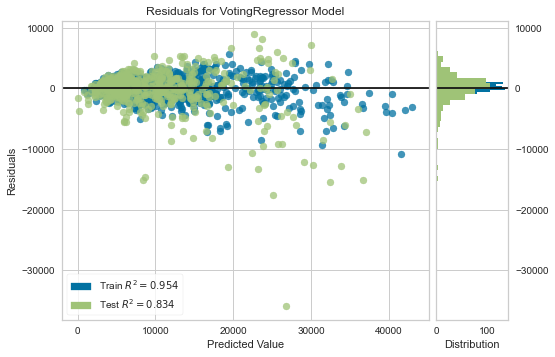

In [26]:
# Residuals Plot 残差プロットを表示
plot_model(tuned_blender_top3, "residuals")

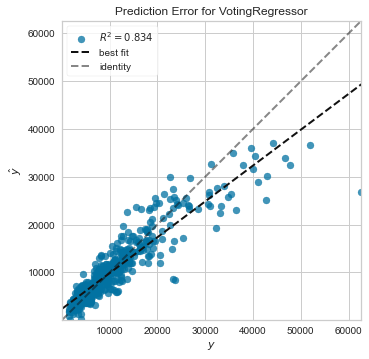

In [27]:
# Prediction Error Plotでは、予測精度
plot_model(tuned_blender_top3, "error")

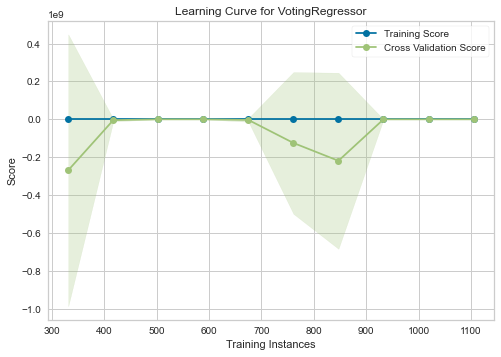

In [28]:
# Learing Curveでは、学習曲線
plot_model(tuned_blender_top3, "learning")

## テスト/ホールドアウトサンプルの予測
モデルを完成させる前に、  
テスト/ホールドアウトセットを予測し、評価メトリックを確認することにより、1つの最終チェックを実行することをお勧めします。  
上記のセクション6の情報グリッドを見ると、データの30％がテスト/ホールドアウトサンプルとして分離されていることがわかります。  
上記で確認したすべての評価指標は、トレーニングセット（70％）のみに基づく相互検証された結果です。  
ここで、tuned_blender_top3変数に格納されている最終的なトレーニング済みモデルを使用して、ホールドアウトサンプルを予測し、  
メトリックを評価して、CVの結果と実質的に異なるかどうかを確認します。

In [29]:
# 確定したモデルで推論
predict_model(tuned_blender_top3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2097.2868,12584231.5634,3547.4260,0.8338,0.3372,0.2345


,temperature,capa,tv_num,distance_km,stadium_mobilization,year_2012,year_2013,year_2014,stage_Ｊ２,home_アビスパ福岡,...,timezone_1,nhk_0,WEATHER_屋,WEATHER_晴,WEATHER_曇,WEATHER_雨,WEATHER_雪,holiday_0,y,Label
0,23.799999,32000.0,3.0,911.167175,0.187766,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4326,5526.221808
1,15.400000,10328.0,2.0,243.224960,0.302382,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2618,3483.524313
2,18.100000,20000.0,2.0,90.817703,0.393850,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6782,10347.587680
3,24.100000,49970.0,3.0,182.737579,0.466300,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,28565,23227.248006
4,20.500000,19694.0,2.0,874.109558,0.766782,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,11755,12189.318240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,16.500000,40728.0,2.0,225.670273,0.369672,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,15077,13444.438935
524,16.900000,15135.0,3.0,807.878418,0.193525,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1447,1777.821663
525,28.900000,19628.0,2.0,482.502136,0.721036,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9119,10820.854054
526,23.299999,15600.0,2.0,36.511356,0.725673,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7412,7183.830086


r2= 0.8338  
モデルを調整した時の r2= 0.8544 より下がっているが、  
モデルを完成させ、見えないデータ（最初に分離し、PyCaretにさらされたことのない10％）を予測することで前進します。

## モデルの完成
`finalize_model()`関数は、モデルをテスト/ホールドアウトサンプル（この場合は30％）を含む完全なデータセットに適合させます

In [30]:
final_blender_top3 = finalize_model(tuned_blender_top3)
final_blender_top3

/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/niko/Desktop/MyApp/st

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                   

In [31]:
predict_model(final_blender_top3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,1328.4397,3910841.4356,1977.5847,0.9484,0.2149,0.1622


,temperature,capa,tv_num,distance_km,stadium_mobilization,year_2012,year_2013,year_2014,stage_Ｊ２,home_アビスパ福岡,...,timezone_1,nhk_0,WEATHER_屋,WEATHER_晴,WEATHER_曇,WEATHER_雨,WEATHER_雪,holiday_0,y,Label
0,23.799999,32000.0,3.0,911.167175,0.187766,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4326,5162.531071
1,15.400000,10328.0,2.0,243.224960,0.302382,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2618,3332.644931
2,18.100000,20000.0,2.0,90.817703,0.393850,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6782,8583.973309
3,24.100000,49970.0,3.0,182.737579,0.466300,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,28565,24804.049788
4,20.500000,19694.0,2.0,874.109558,0.766782,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,11755,11817.344801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,16.500000,40728.0,2.0,225.670273,0.369672,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,15077,14904.772638
524,16.900000,15135.0,3.0,807.878418,0.193525,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1447,1211.045927
525,28.900000,19628.0,2.0,482.502136,0.721036,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9119,10390.720352
526,23.299999,15600.0,2.0,36.511356,0.725673,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7412,7750.480955


70％のデータでモデルを調整して、さらに残り30％分を読み込んだので最終的にfinalize_modelで合わせたので  
r2= 0.8338 から r2=0.9484まで上がった

 ## 見えないデータを予測する
見えないデータセットを予測するために`predict_model（）`を使用されます。  
*データdata_unseen*は、最初に作成された変数であり、PyCaretに公開されたことのない元のデータセットの10％が含まれている  
final_lightgbmモデルを使用した予測値が、データdata_unseenセットに`Label列`が追加される

In [32]:
unseen_predictions = predict_model(final_blender_top3, data=data_unseen)
unseen_predictions.head()

,y,year,stage,home,away,stadium,temperature,referee,capa,tv_num,distance_km,stadium_mobilization,MONTH,WEEK,timezone,nhk,WEATHER,holiday,Label
0,5658,2014,Ｊ２,横浜ＦＣ,ＦＣ岐阜,ニッパツ三ツ沢球技場,17.8,扇谷 健司,15454,2,257.763469,0.362398,4,日,1,0,曇,0,5113.248284
1,6565,2014,Ｊ２,京都サンガF.C.,モンテディオ山形,京都市西京極総合運動公園陸上競技場兼球技場,15.9,松尾 一,20588,3,557.682459,0.355377,4,日,1,0,曇,0,6582.221718
2,2272,2014,Ｊ２,愛媛ＦＣ,カターレ富山,ニンジニアスタジアム,11.5,河合 英治,15576,3,510.864549,0.226759,4,日,1,0,雨,0,1806.841730
3,4833,2014,Ｊ２,アビスパ福岡,Ｖ・ファーレン長崎,レベルファイブスタジアム,13.4,前田 拓哉,22563,3,91.917593,0.227142,4,日,1,0,雨,0,4807.732514
4,3970,2014,Ｊ２,ギラヴァンツ北九州,ジュビロ磐田,北九州市立本城陸上競技場,13.0,山本 雄大,10202,2,664.230610,0.306558,4,日,1,0,雨,0,2800.055851


In [33]:
# 測定基準
from pycaret.utils import check_metric
check_metric(unseen_predictions.y, unseen_predictions.Label, 'R2')

0.817

## モデルの保存
予測したい新しいデータが出てきた時に使う  
（コンペではしなくていいかも。コメントアウトしよ）  
（保存したモデルの呼び出しは省略）

In [ ]:
# # save_model関数を使うと、モデルの保存をする
# save_model(final_blender_top3, model_name="0317_blender_top3_model")
# %ls
# # 0314_rf_model.pklのファイル名で保存された

## 予測データを作る（コンペ提出用）

### データの読み込み

In [34]:
test = pd.read_csv("data/create/test_all_column_addition.csv")

In [35]:
# 必要なものを抜き出す trainとのちがいは、yがない
select_cols = ['year', 'stage', 'home', 'away',
       'stadium', 'temperature', 'referee', 'capa', 'tv_num',  'distance_km', 
       'stadium_mobilization', 'MONTH', 'WEEK', 'timezone', 'nhk', 'WEATHER', 'holiday']
testX = test[select_cols]
testX.insert(0, 'y', None)

In [36]:
testX.head()

,y,year,stage,home,away,stadium,temperature,referee,capa,tv_num,distance_km,stadium_mobilization,MONTH,WEEK,timezone,nhk,WEATHER,holiday
0,None,2014,Ｊ１,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,27.4,中村 太,19694,2,288.608038,0.766782,8,土,0,0,晴,0
1,None,2014,Ｊ１,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,30.8,扇谷 健司,40728,2,770.014476,0.369672,8,土,0,0,晴,0
2,None,2014,Ｊ１,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,31.7,松尾 一,63700,4,436.036443,0.584160,8,土,0,0,晴,0
3,None,2014,Ｊ１,柏レイソル,川崎フロンターレ,日立柏サッカー場,29.3,高山 啓義,15349,2,41.309766,0.771255,8,土,0,0,晴,0
4,None,2014,Ｊ１,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,30.4,今村 義朗,42300,2,481.886533,0.576560,8,土,0,0,晴,0


### `predict_model`で予測

In [37]:
testX.drop('y', axis = 1, inplace = True)
test_data_predictions_blender_top3=predict_model(final_blender_top3, data = testX)
test_data_predictions_blender_top3

,year,stage,home,away,stadium,temperature,referee,capa,tv_num,distance_km,stadium_mobilization,MONTH,WEEK,timezone,nhk,WEATHER,holiday,Label
0,2014,Ｊ１,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,27.4,中村 太,19694,2,288.608038,0.766782,8,土,0,0,晴,0,14069.984477
1,2014,Ｊ１,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,30.8,扇谷 健司,40728,2,770.014476,0.369672,8,土,0,0,晴,0,16847.696146
2,2014,Ｊ１,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,31.7,松尾 一,63700,4,436.036443,0.584160,8,土,0,0,晴,0,35674.461813
3,2014,Ｊ１,柏レイソル,川崎フロンターレ,日立柏サッカー場,29.3,高山 啓義,15349,2,41.309766,0.771255,8,土,0,0,晴,0,12973.208853
4,2014,Ｊ１,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,30.4,今村 義朗,42300,2,481.886533,0.576560,8,土,0,0,晴,0,30878.725465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2014,Ｊ２,カターレ富山,ファジアーノ岡山,富山県総合運動公園陸上競技場,13.3,長谷 拓,25250,2,367.228214,0.143683,11,日,1,0,曇,1,6459.094467
309,2014,Ｊ２,京都サンガF.C.,ＦＣ岐阜,京都市西京極総合運動公園陸上競技場兼球技場,17.4,松尾 一,20588,5,107.623923,0.355377,11,日,1,0,晴,1,12773.834892
310,2014,Ｊ２,カマタマーレ讃岐,ジェフユナイテッド千葉,香川県立丸亀競技場,23.0,高山 啓義,22338,2,597.233124,0.124093,11,日,1,0,晴,1,6196.555754
311,2014,Ｊ２,アビスパ福岡,ロアッソ熊本,レベルファイブスタジアム,19.5,三上 正一郎,22563,2,88.865814,0.227142,11,日,1,0,晴,1,9097.656432


### 提出データの作成

In [38]:
sample = pd.read_csv("data/received/sample_submit.csv",header=None)
sample[1] = test_data_predictions_blender_top3['Label']
sample.to_csv("data/predict/0319_Modeling_pycarent_blender_top3.csv",index=None,header=None)

SIGNATE投稿結果 3,209.1424947

## 最小値補正

In [39]:
# pred = model3.predict(trainX)
print("MIN", sample[1].min(), train[train["y"]>0]["y"].min())
# 予測値が学習データの最小値を下回るケースは7ケース
print(sample[1][sample[1]<train[train["y"]>0]["y"].min()])

MIN 2847.2606960149246 1104
Series([], Name: 1, dtype: float64)


最小値が、学習データより小さいのはなかったので補正なし

## 残差分析をして、更に精度を上げるか検討

In [40]:
train.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa', 'tv_num', 'home_lat',
       'home_long', 'away_lat', 'away_long', 'distance_km', 'mobilization',
       'stage_stadium', 'stadium_mobilization', 'MONTH', 'WEEK', 'timezone',
       'WEEK_timezone_num', 'nhk', 'WEATHER', 'temp_condition', 'hours',
       'holiday'],
      dtype='object')

In [43]:
# # trainの全部のデータに予測する
tmp = train_select.copy()
tmp.drop('y', axis = 1, inplace = True)
tmp_pred = predict_model(final_blender_top3, data=tmp)

# investigation=検査
investigation = train.copy()
investigation['Label'] = tmp_pred[['Label']]
investigation['res'] = investigation['y'] - investigation['Label']
investigation.sort_values(by="res")[["res","y","Label","capa","year","stage","match","gameday","time","home","away","tv","temperature","weather","stadium_mobilization","mobilization"]].head(30)

,res,y,Label,capa,year,stage,match,gameday,time,home,away,tv,temperature,weather,stadium_mobilization,mobilization
791,-9229.670606,13702,22931.670606,47816,2013,Ｊ１,第３節第１日,03/16(土),15:04,セレッソ大阪,ＦＣ東京,スカパー！／スカパー！プレミアムサービス,13.8,晴,0.554919,0.286557
1641,-8822.509554,9515,18337.509554,50000,2014,Ｊ１,第１２節第２日,07/15(火),19:04,サンフレッチェ広島,横浜Ｆ・マリノス,スカパー！／スカパー！プレミアムサービス,25.1,晴,0.306080,0.190300
32,-8813.281038,16836,25649.281038,42300,2012,Ｊ１,第４節第１日,03/31(土),16:03,アルビレックス新潟,ガンバ大阪,スカパー／ｅ２／スカパー光,7.1,雨,0.576560,0.398014
1033,-6962.376353,34814,41776.376353,63700,2013,Ｊ１,第３０節第２日,10/27(日),16:05,浦和レッズ,柏レイソル,スカパー！／スカパー！プレミアムサービス／テレ玉／ＮＨＫ総合,17.3,晴,0.584160,0.546531
29,-6852.108266,25743,32595.108266,63700,2012,Ｊ１,第４節第１日,03/31(土),15:03,浦和レッズ,川崎フロンターレ,スカパー／ｅ２／スカパー光／テレ玉,10.0,雨,0.584160,0.404129
796,-6714.275485,13721,20435.275485,47816,2013,Ｊ１,第４節第１日,03/30(土),13:04,セレッソ大阪,ベガルタ仙台,スカパー！／スカパー！プレミアムサービス,16.1,晴,0.554919,0.286954
28,-6660.412153,16229,22889.412153,49970,2012,Ｊ１,第４節第１日,03/31(土),14:04,ＦＣ東京,サンフレッチェ広島,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＴＯＫＹＯ ＭＸ（録）,16.3,雨,0.466300,0.324775
1578,-6088.607663,12174,18262.607663,30132,2014,Ｊ１,第５節第２日,03/29(土),15:04,ヴィッセル神戸,浦和レッズ,スカパー！／スカパー！プレミアムサービス,17.7,晴,0.465817,0.404022
812,-5998.076904,23295,29293.076904,63700,2013,Ｊ１,第５節第１日,04/06(土),19:04,浦和レッズ,ジュビロ磐田,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉,15.6,雨,0.584160,0.365699
1537,-5970.400431,13809,19779.400431,54224,2014,Ｊ１,第１節第１日,03/01(土),14:05,ヴァンフォーレ甲府,鹿島アントラーズ,スカパー！／スカパー！プレミアムサービス／ＮＨＫ甲府／ＮＨＫ水戸,9.1,曇,0.477722,0.254666


In [46]:
investigation.sort_values(by="res",ascending=False)[["res","y","Label","capa","year","stage","match","gameday","time","home","away","tv","temperature","weather","stadium_mobilization","mobilization"]].head(60)

,res,y,Label,capa,year,stage,match,gameday,time,home,away,tv,temperature,weather,stadium_mobilization,mobilization
1066,15989.675808,54905,38915.324192,63700,2013,Ｊ１,第３４節第１日,12/07(土),15:34,浦和レッズ,セレッソ大阪,スカパー！／スカパー！プレミアムサービス／テレ玉,12.6,晴,0.584160,0.861931
1059,15699.281500,62632,46932.718500,72327,2013,Ｊ１,第３３節第１日,11/30(土),14:04,横浜Ｆ・マリノス,アルビレックス新潟,スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合,12.7,晴,0.342465,0.865956
1653,11752.307255,54350,42597.692745,63700,2014,Ｊ１,第１４節第１日,05/17(土),14:04,浦和レッズ,セレッソ大阪,スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合,23.6,晴,0.584160,0.853218
784,10078.663521,52293,42214.336479,63700,2013,Ｊ１,第２節第１日,03/09(土),16:05,浦和レッズ,名古屋グランパス,スカパー！／スカパー！プレミアムサービス／テレ玉（録）,21.6,晴,0.584160,0.820926
653,9497.624889,23617,14119.375111,40000,2012,Ｊ２,第３２節第１日,09/02(日),18:05,大分トリニータ,ヴァンフォーレ甲府,スカパー／ｅ２／スカパー光,26.4,曇,0.202050,0.590425
1065,9239.815850,26897,17657.184150,40728,2013,Ｊ１,第３４節第１日,12/07(土),15:33,鹿島アントラーズ,サンフレッチェ広島,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／ＮＨＫ広島,11.3,晴,0.369672,0.660406
1602,8974.792895,40761,31786.207105,49970,2014,Ｊ１,第８節第１日,04/19(土),16:04,ＦＣ東京,セレッソ大阪,スカパー！／スカパー！プレミアムサービス,13.2,曇,0.466300,0.815709
1631,8683.379059,38966,30282.620941,40000,2014,Ｊ１,第１１節第１日,05/03(土・祝),19:04,名古屋グランパス,セレッソ大阪,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／名古屋テレビ（録）,17.8,晴,0.512800,0.974150
1566,8328.347978,32099,23770.652022,40728,2014,Ｊ１,第４節第１日,03/23(日),15:04,鹿島アントラーズ,セレッソ大阪,スカパー！／スカパー！プレミアムサービス,13.9,晴,0.369672,0.788131
756,7974.149913,17028,9053.850087,40000,2012,Ｊ２,第４１節第１日,11/04(日),13:05,大分トリニータ,モンテディオ山形,スカパー！／スカパー！プレミアムサービス,17.7,曇,0.202050,0.425700


In [ ]:

# train_data_predictions_lightgbm=predict_model(final_lightgbm, data = testX)
# train_data_predictions_lightgbm

In [ ]:
# tmp = train[train["y"]>0]
# tmp = tmp.drop(columns="pred")

# tmp["pred"] = model3.predict(trainX)
# tmp["res"] = tmp["y"] - tmp["pred"]
# tmp.sort_values(by="res")[["res","y","capa","pred","year","stage","match","gameday","time","home","away","tv"]].head(10)

In [ ]:
# dat = train[(train["home"]=="サガン鳥栖")&(train["year"]==2012)].reset_index(drop=True) # indexがとびとびになるので、0,1,2になるようにリセット
dat = train[(train["home"]=="サガン鳥栖")].reset_index(drop=True) # indexがとびとびになるので、0,1,2になるようにリセット
dat